In [2]:
import numpy as np
import pandas as pd

import os
import sys
sys.path.append('../src')

import wget
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as imgplt
from PIL import Image
from pathlib import Path 
    # https://realpython.com/python-pathlib/ 
    # https://github.com/chris1610/pbpython/blob/master/extras/Pathlib-Cheatsheet.pdf
    # https://zetcode.com/python/pathlib/
#import src.code1_data as go


In [3]:
Path.cwd()

PosixPath('/Users/cris/Iron/ReadingyourAudience/notebooks')

In [4]:
Path.home()

PosixPath('/Users/cris')

In [5]:
 ### BEST EXPLANATION OF CNN!!!
# https://medium.com/@ageitgey/machine-learning-is-fun-part-3-deep-learning-and-convolutional-neural-networks-f40359318721

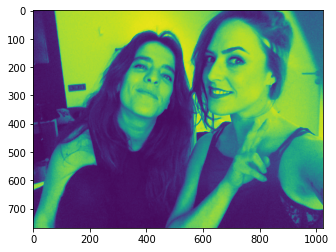

In [6]:
# 2, 13, 14, 21, 24
pth = "../imgs/origsmall24.jpg"
img = cv2.imread(pth)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # array 1002 x 1334
plt.imshow(gray)

In [7]:
def load_gray(path):
    img = cv2.imread(pth)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # array 1002 x 1334
    #plt.imshow(gray)
    return img

In [8]:

haar_face = 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'
haar_eyes = 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml'
haar_smile = 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_smile.xml'
file_face = wget.download(haar_face)
file_eyes = wget.download(haar_eyes)
file_smile = wget.download(haar_smile)


In [9]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')
print(face_cascade, eye_cascade, smile_cascade)

<CascadeClassifier 0x7f8b337d0a30> <CascadeClassifier 0x7f8b337d0a90> <CascadeClassifier 0x7f8b337d0ad0>


In [10]:

def transfImag(path):
    print ('transforming image from {}'.format(path))

    input_img=cv2.imread(path)
    input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(input_img, 1.25, 6)
    x,y,w,h = faces[0]
    img_data= input_img[y:y+h,x:x+w]
    img_data=cv2.resize(img_data,(48,48))
    
    img_data = np.stack(img_data)
    img_data = img_data / 255.0
    
    return img_data

In [32]:
pth = "../imgs/origsmall14.jpg"
pict = transfImag(pth)  # transform pic
print(pict.shape)
input_img=cv2.imread('../imgs/origsmall14.jpg') # get the array of the original pic

transforming image from ../imgs/origsmall14.jpg
(48, 48)


(1, 48, 48, 1)


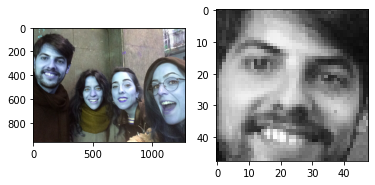

In [33]:
plt.subplot(121)
plt.imshow(input_img) # original pic
plt.subplot(122)
plt.imshow(Image.fromarray(pict.squeeze()*255)) # transformed pic

pict = np.expand_dims(pict,axis=0).reshape(np.expand_dims(pict,axis=0).shape[0], 48, 48, 1)
print(pict.shape)
#pred2 = model.predict(PIC)[0]

In [ ]:
"""
bunchofphotos = list(range(1,38))
print(bunchofphotos)
"""

In [ ]:
image = Image.open("../imgs/origsmall21.jpg")
plt.imshow(image)

In [ ]:
pth = "../imgs/origsmall21.jpg"
img = cv2.imread(pth)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # array 1002 x 1334
plt.imshow(gray)

In [ ]:
# https://github.com/ageitgey/face_recognition#face-recognition

# https://github.com/ageitgey/face_recognition/blob/master/examples/facerec_from_webcam_faster.py

In [ ]:
scaling_factor = 1.3
nearest_neighs = 5
pth = "../imgs/origsmall21.jpg"
img = cv2.imread(pth)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    smile = smile_cascade.detectMultiScale(roi_gray, 1.8, 20)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex, ey),(ex + ew,ey + eh),(255,0,0),2)
    for (sx, sy, sw, sh) in smile:
        cv2.rectangle(roi_color, (sx, sy), ((sx + sw), (sy + sh)), (0, 0, 255), 2)
#cv2.imwrite(savepth,img)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:

for i in bunchofphotos:
    pth = f"../imgs/origsmall{i}.jpg"
    savepth = 'origsmall{i}.jpg'
    img = cv2.imread(pth)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # array 1002 x 1334
    
    scaling_factor = 1.3
    nearest_neighs = 5
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        smile = smile_cascade.detectMultiScale(roi_gray, 1.8, 20)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex, ey),(ex + ew,ey + eh),(0,255,0),2)
        for (sx, sy, sw, sh) in smile:
            cv2.rectangle(roi_color, (sx, sy), ((sx + sw), (sy + sh)), (0, 0, 255), 2)
    cv2.imwrite(savepth,img)
    cv2.imshow('img',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
for i in range(1,6):
    print(i)

In [ ]:

pth = "../imgs/sil2.jpg"
picpath = '../imgs/Snapseed.jpg'
input_img=cv2.imread(pth)
input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(input_img, 1.25, 6)

In [ ]:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html
# https://www.geeksforgeeks.org/python-smile-detection-using-opencv/

#### UNIQUE PATH NAMES

In [ ]:
Path.cwd()

In [ ]:
def unique_path(directory, name_pattern):
    counter = 0
    while True:
        counter += 1
        path = directory / name_pattern.format(counter)
        if not path.exists():
            return path

path = unique_path(pathlib.Path.cwd(), 'test{:03d}.txt')
"""
how to construct a unique numbered file name based on a template. 
First, specify a pattern for the file name, with room for a counter. 
Then, check the existence of the file path created by:
joining a directory and the file name (with a value for the counter). 
If it already exists, increase the counter and try again.
If the directory already contains the files test001.txt and test002.txt, 
the above code will set path to test003.txt.
"""
